<a href="https://colab.research.google.com/github/im-hjk/dankook_dacon/blob/master/dacon_eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical_Features

# Imports

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
 
from google.colab import drive 
drive.mount('/content/drive')
 
import graphviz
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import io
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
 
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

Mounted at /content/drive


In [ ]:
main_path = Path('/content/drive/My Drive/Colab Notebooks/dacon_dkdkdk')
data_dir = main_path / 'data/dacon-dku'
feature_dir = main_path / 'build/feature'
val_dir = main_path / 'build/val'
tst_dir = main_path / 'build/tst'
sub_dir = main_path / 'build/sub'
 
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'
feature_file = feature_dir / 'feature_test.csv'
 
target_col = 'class'
seed = 42
 
df = pd.read_csv(trn_file, index_col=0)

# EDA

In [ ]:
print(df.shape)
df.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [ ]:
df.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


In [ ]:
target_col = 'class'
pred_col = 'pred'
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']


In [ ]:
df['redshift'].quantile(np.arange(0, 1, .01))

0.00   -166.0483
0.01     -0.0009
0.02     -0.0007
0.03     -0.0005
0.04     -0.0005
          ...   
0.95      0.1815
0.96      0.1954
0.97      0.2149
0.98      0.2446
0.99      0.3062
Name: redshift, Length: 100, dtype: float64

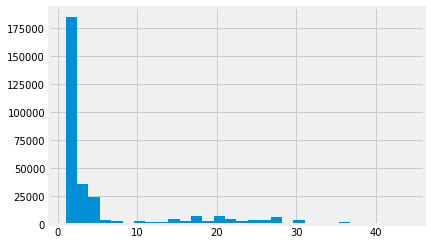

In [ ]:
df['nObserve'].hist(bins=30)

In [ ]:
df.corr().style.background_gradient()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1.0000,0.0486,0.8181,0.0175,0.0142,-0.0092,0.9352,0.0810,0.7828,0.0350,0.0214,0.2273,0.2211,0.0763,0.0761,0.0764,0.0764,0.0762,-0.3793
g,0.0486,1.0000,0.0497,0.5913,0.5437,-0.0004,0.0470,0.9990,0.0482,0.7074,0.5004,0.0117,0.0114,0.0020,0.0019,0.0021,0.0020,0.0020,-0.0195
r,0.8181,0.0497,1.0000,0.0228,0.0191,-0.0063,0.8057,0.0855,0.9695,0.0474,0.0306,0.2059,0.1956,0.0763,0.0760,0.0766,0.0765,0.0762,-0.3749
i,0.0175,0.5913,0.0228,1.0000,0.9197,-0.0002,0.0175,0.5904,0.0225,0.9879,0.6990,0.0056,0.0056,-0.0008,-0.0008,-0.0007,-0.0007,-0.0008,-0.0101
z,0.0142,0.5437,0.0191,0.9197,1.0000,-0.0002,0.0140,0.5428,0.0189,0.9086,0.9190,0.0052,0.0052,-0.0015,-0.0015,-0.0014,-0.0014,-0.0015,-0.0100
redshift,-0.0092,-0.0004,-0.0063,-0.0002,-0.0002,1.0000,-0.0076,-0.0002,-0.0030,-0.0001,-0.0002,-0.0078,-0.0076,0.0014,0.0014,0.0014,0.0014,0.0014,0.0738
dered_u,0.9352,0.0470,0.8057,0.0175,0.0140,-0.0076,1.0000,0.0869,0.8405,0.0380,0.0232,0.2224,0.2169,0.0883,0.0878,0.0886,0.0884,0.0881,-0.3379
dered_g,0.0810,0.9990,0.0855,0.5904,0.5428,-0.0002,0.0869,1.0000,0.0887,0.7072,0.5001,0.0197,0.0190,0.0059,0.0058,0.0060,0.0059,0.0058,-0.0304
dered_r,0.7828,0.0482,0.9695,0.0225,0.0189,-0.0030,0.8405,0.0887,1.0000,0.0490,0.0315,0.2000,0.1900,0.0839,0.0834,0.0843,0.0841,0.0837,-0.3413
dered_i,0.0350,0.7074,0.0474,0.9879,0.9086,-0.0001,0.0380,0.7072,0.0490,1.0000,0.7075,0.0112,0.0108,0.0018,0.0017,0.0019,0.0018,0.0017,-0.0183


In [ ]:
trn_test = df.sample(n=10000, random_state=seed)

In [ ]:
sns.pairplot(data=trn_test, vars=num_cols + [target_col], hue = "class") ##시간 주의!!

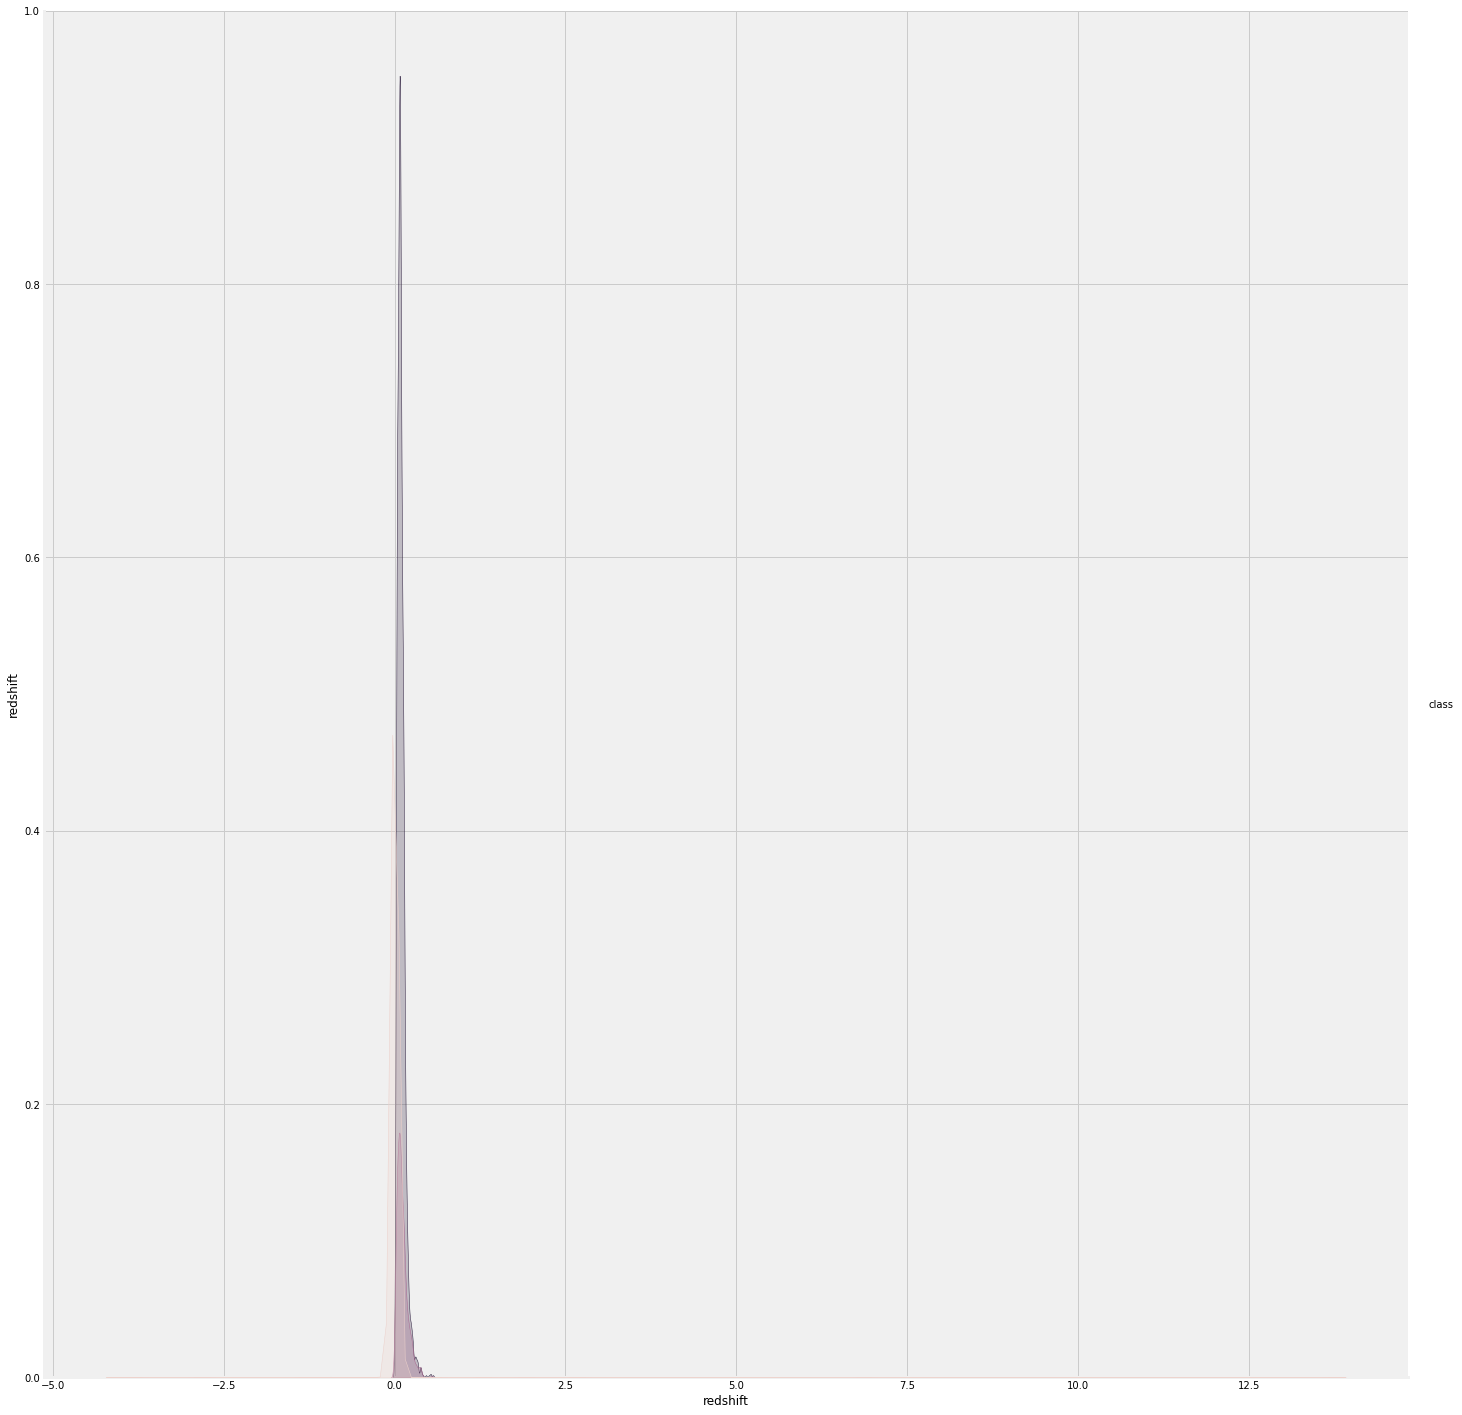

In [ ]:
sns.pairplot(data=trn_test, vars=['redshift'], hue = "class", height = 10)

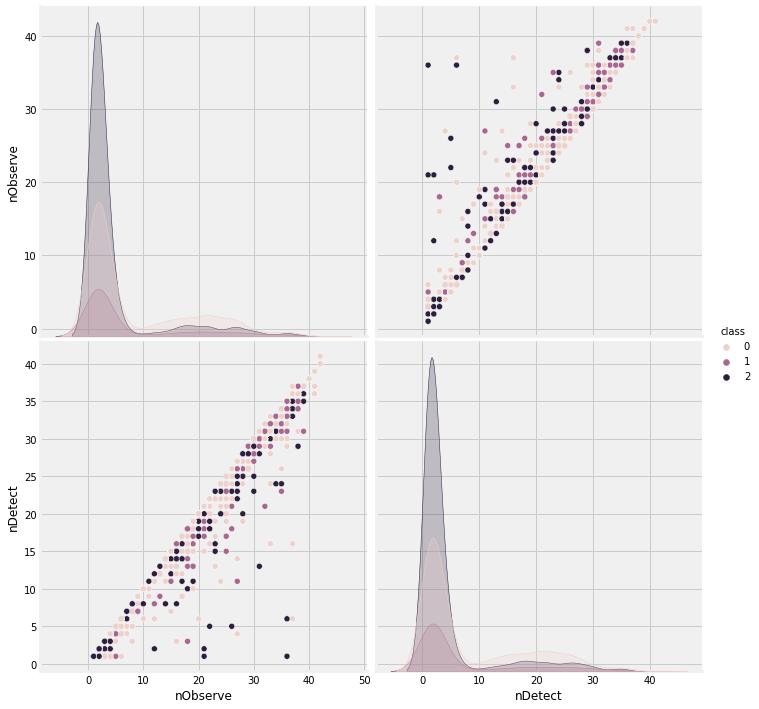

In [ ]:
sns.pairplot(data=trn_test, vars=['nObserve', 'nDetect'], hue = "class", height=5)

##Now 가공하기 -trn&tst 합치기-

In [ ]:
tst = pd.read_csv(tst_file, index_col=0)
print(tst.shape)
tst.head()

(80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.1431,18.0172,17.4733,17.1144,16.9263,1.2130e-01,19.0750,17.9550,17.4308,17.0838,16.9087,1,1,1.1563,1.1515,1.1613,1.1588,1.1539
320001,18.7409,17.1705,16.3691,15.9865,15.7307,-6.6907e-05,15.0703,14.3098,14.3901,14.5160,14.6372,2,2,1.0076,1.0074,1.0080,1.0078,1.0075
320002,19.2980,17.8803,17.2221,16.8096,16.6352,1.1001e-01,19.1004,17.7726,17.1460,16.7497,16.5689,1,1,1.3809,1.3905,1.3715,1.3761,1.3856
320003,18.0775,17.1569,16.9041,16.8118,16.7955,2.9697e-05,17.9729,17.0735,16.8470,16.7700,16.7668,1,1,1.1408,1.1408,1.1409,1.1408,1.1408
320004,17.8325,16.7646,16.2135,15.8722,15.6621,6.8471e-02,17.7545,16.6794,16.1563,15.8315,15.6433,2,2,1.1110,1.1077,1.1145,1.1127,1.1093


In [ ]:
temp = pd.concat([df,tst], axis = 0)
print(temp.shape)
temp.head()

(400000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0


In [ ]:
temp.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,NaN
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,NaN


In [ ]:
temp.fillna(-1,inplace=True)
temp.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,-1.0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,-1.0
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,-1.0
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,-1.0
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,-1.0


## Now 피쳐 변환해주기

####피쳐 통합/가지치기

In [ ]:
tp = temp

In [ ]:
tp['airmass'] = tp['airmass_u'] + tp['airmass_g'] + tp['airmass_r'] + tp['airmass_i'] + tp['airmass_z']
tp['airmass'] = tp['airmass']/5
tp.drop(['airmass_u','airmass_g','airmass_r','airmass_i','airmass_z'],axis=1, inplace=True)

In [ ]:
tp.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,class,airmass
id,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,NaN,1.1859
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,NaN,1.2850
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,NaN,1.1885
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,NaN,1.1805
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,NaN,1.1832


In [ ]:
tp['n_obMde'] = tp['nObserve'] - tp['nDetect']
#tp['n_obDde'] = tp['nDetect'] / tp['nObserve']
#tp['n_obXde'] = tp['nDetect'] * tp['nObserve']

In [ ]:
#tp['n_obXde'] = tp['nDetect']  tp['nObserve']

In [ ]:
#tp.drop(['nObserve','nDetect'],axis=1, inplace=True)

In [ ]:
tp.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,class,airmass,n_obMde
id,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,-1.0,1.1859,0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,-1.0,1.2850,4
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,-1.0,1.1885,0
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,-1.0,1.1805,0
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,-1.0,1.1832,0


In [ ]:
tp['d_dered_u'] = tp['dered_u'] - tp['u']
tp['d_dered_g'] = tp['dered_g'] - tp['g']
tp['d_dered_r'] = tp['dered_r'] - tp['r']
tp['d_dered_i'] = tp['dered_i'] - tp['i']
tp['d_dered_z'] = tp['dered_z'] - tp['z']


tp['d_dered_rg'] = tp['dered_r'] - tp['dered_g']
tp['d_dered_ig'] = tp['dered_i'] - tp['dered_g']
tp['d_dered_zg'] = tp['dered_z'] - tp['dered_g']
tp['d_dered_ri'] = tp['dered_r'] - tp['dered_i']
tp['d_dered_rz'] = tp['dered_r'] - tp['dered_z']
tp['d_dered_iz'] = tp['dered_i'] - tp['dered_z']


In [ ]:
tp['u/g'] = tp['u'] / tp['g']
tp['u/r'] = tp['u'] / tp['r']
tp['u/i'] = tp['u'] / tp['i']
tp['u/z'] = tp['u'] / tp['z']

tp['g/r'] = tp['g'] / tp['r']
tp['g/i'] = tp['g'] / tp['i']
tp['g/z'] = tp['g'] / tp['z']

tp['r/i'] = tp['r'] / tp['i']
tp['r/z'] = tp['r'] / tp['z']

tp['i/z'] = tp['i'] / tp['z']


In [ ]:
tp.drop(['d_dered_rg','d_dered_ri','u','g','r','i'],axis=1, inplace=True)

In [ ]:
tp.drop(['g/r','nObserve'],axis=1, inplace=True)

In [ ]:
tp.corr().style.background_gradient()

,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nDetect,class,airmass,n_obMde,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,u/g,u/r,u/i,u/z,g/i,g/z,r/i,r/z,i/z
z,1.0000,-0.0002,0.0144,0.5303,0.0196,0.8881,0.7096,0.0053,-0.0083,-0.0002,0.0024,-0.0009,-0.5309,-0.0007,-0.8904,-0.7360,0.7237,0.5270,-0.7092,-0.1904,0.0152,-0.0034,0.0246,0.0239,0.0228,0.0241,0.0611,0.0494,0.0095
redshift,-0.0002,1.0000,-0.0080,-0.0002,-0.0028,-0.0001,-0.0001,-0.0067,0.0484,0.0011,-0.0037,0.0016,0.0005,0.0106,0.0002,0.0001,0.0001,-0.0000,-0.0000,0.0001,-0.0104,-0.0067,-0.0101,-0.0111,-0.0038,-0.0073,-0.0090,-0.0111,-0.0046
dered_u,0.0144,-0.0080,1.0000,0.0969,0.8392,0.0423,0.0249,0.2172,-0.2120,0.0889,0.1182,0.1470,0.0068,0.1521,0.0013,0.0036,-0.0374,-0.0209,0.0100,0.0025,0.2524,0.4353,0.5402,0.5259,0.5212,0.5474,0.4265,0.4483,0.1573
dered_g,0.5303,-0.0002,0.0969,1.0000,0.0990,0.7072,0.4476,0.0212,-0.0219,0.0071,0.0132,0.0149,-0.9928,0.0158,-0.4733,-0.3218,-0.0037,-0.0020,-0.4437,0.0002,0.0325,0.0168,0.0541,0.0517,0.0484,0.0513,0.0886,0.0752,0.0147
dered_r,0.0196,-0.0028,0.8392,0.0990,1.0000,0.0549,0.0340,0.1899,-0.2139,0.0848,0.1475,0.1329,0.0065,0.1388,0.0018,0.0048,-0.0217,-0.0117,0.0076,0.0010,-0.1013,-0.0595,0.1007,0.1374,0.2337,0.2761,0.3189,0.3166,0.0924
dered_i,0.8881,-0.0001,0.0423,0.7072,0.0549,1.0000,0.6331,0.0119,-0.0136,0.0026,0.0076,0.0080,-0.7048,0.0082,-0.9566,-0.6508,0.7044,0.3526,-0.6312,0.0000,0.0143,-0.0099,0.0239,0.0214,0.0221,0.0214,0.0702,0.0512,0.0040
dered_z,0.7096,-0.0001,0.0249,0.4476,0.0340,0.6331,1.0000,0.0081,-0.0090,-0.0010,0.0047,0.0042,-0.4463,0.0043,-0.6057,-0.0452,0.4461,0.8933,-0.9991,-0.7740,0.0084,-0.0083,0.0125,0.0320,0.0107,0.0402,0.0420,0.0693,0.0413
nDetect,0.0053,-0.0067,0.2172,0.0212,0.1899,0.0119,0.0081,1.0000,-0.1362,0.2500,0.2676,-0.0182,-0.0013,-0.0191,-0.0008,0.0003,-0.0044,-0.0016,-0.0002,-0.0007,0.0637,0.0980,0.0947,0.0830,0.0697,0.0637,0.0351,0.0320,0.0082
class,-0.0083,0.0484,-0.2120,-0.0219,-0.2139,-0.0136,-0.0090,-0.1362,1.0000,-0.0483,-0.0314,0.0791,0.0040,0.0793,0.0026,0.0031,0.0027,0.0009,0.0001,0.0005,-0.0480,-0.0653,-0.0899,-0.0822,-0.0754,-0.0741,-0.0743,-0.0650,-0.0101
airmass,-0.0002,0.0011,0.0889,0.0071,0.0848,0.0026,-0.0010,0.2500,-0.0483,1.0000,0.0882,0.0307,0.0031,0.0313,0.0028,-0.0008,-0.0034,-0.0047,0.0046,0.0035,0.0151,0.0211,0.0203,0.0164,0.0127,0.0097,0.0073,0.0048,-0.0004


In [ ]:
tp_test = tp.sample(n=10000, random_state=seed)

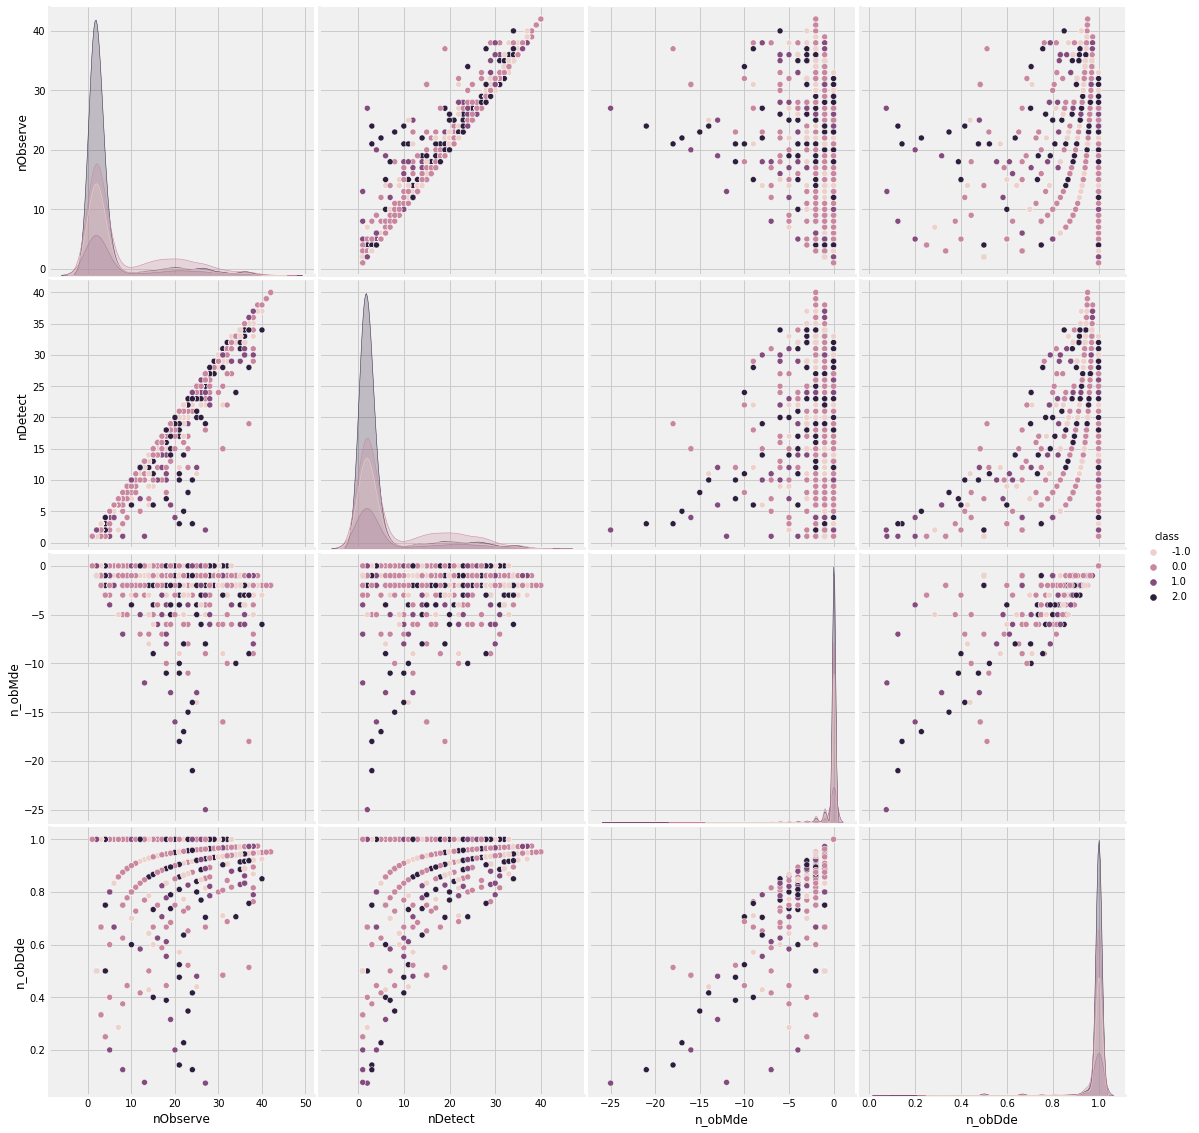

In [ ]:
sns.pairplot(data=tp_test, vars=['nObserve','nDetect','n_obMde','n_obDde'], hue = "class", height = 4)

####피쳐 변신시키기

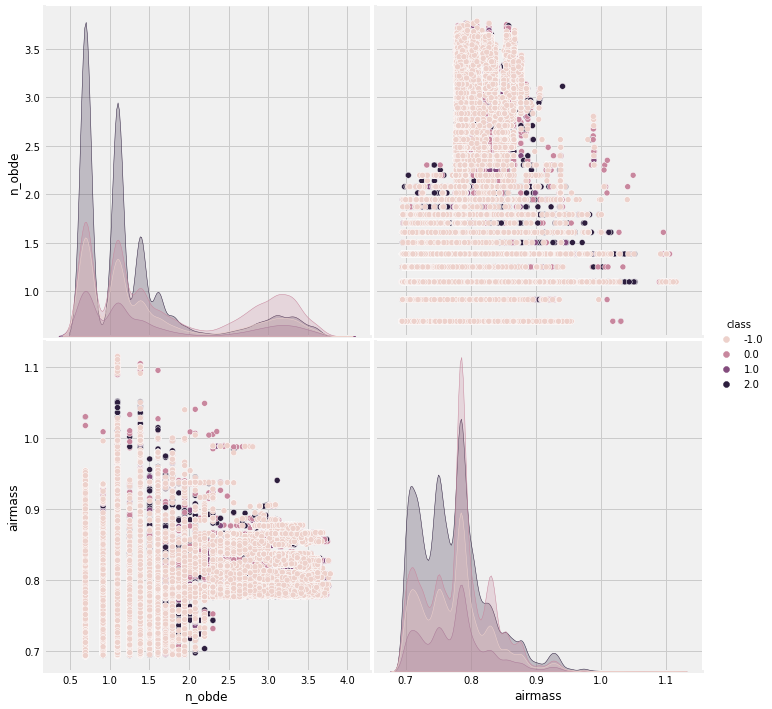

In [ ]:
sns.pairplot(data=tp, vars=['n_obde', 'airmass'], hue='class', size=5)

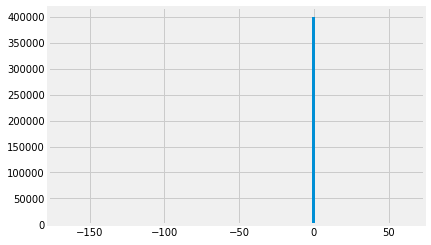

In [ ]:
temp['redshift'].hist(bins=100)

#### 이제 피쳐 파일로

In [ ]:
tp.to_csv(feature_file)

In [ ]:
feature = pd.read_csv(feature_file)
print(feature.shape)
feature.head()

(400000, 31)


,id,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,class,airmass,n_obMde,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,u/g,u/r,u/i,u/z,g/i,g/z,r/i,r/z,i/z,u/_RS,r/_RS
0,0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,0.0,1.1898,0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,1.1439,1.2238,1.3164,1.3733,1.1508,1.2005,1.0757,1.1222,1.0433,2.3264,1.9010
1,1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1.0,1.2533,0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,1.0704,1.1189,1.1344,1.1430,1.0598,1.0678,1.0139,1.0215,1.0076,1.5045,1.3446
2,2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,0.0,1.0225,0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,1.0607,1.0805,1.0905,1.0936,1.0281,1.0310,1.0093,1.0121,1.0028,1.6786,1.5536
3,3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,0.0,1.2054,1,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,1.2111,1.2690,1.2898,1.3069,1.0650,1.0791,1.0164,1.0299,1.0133,2.5661,2.0221
4,4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,0.0,1.1940,1,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,1.1814,1.2842,1.3345,1.3598,1.1296,1.1511,1.0392,1.0589,1.0190,2.4454,1.9042
